<a href="https://colab.research.google.com/github/Sharrfaa/textsummariser/blob/main/IBP_Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [99]:
# running wget command for downloding enron email data

!wget -O enron.db https://curtin-my.sharepoint.com/:u:/g/personal/211934g_curtin_edu_au/EaYagsqa2r1Bi5wtHbswGFwBH2kd2uTnz6rlka7GI36GUQ?download=1

--2023-05-28 10:28:10--  https://curtin-my.sharepoint.com/:u:/g/personal/211934g_curtin_edu_au/EaYagsqa2r1Bi5wtHbswGFwBH2kd2uTnz6rlka7GI36GUQ?download=1
Resolving curtin-my.sharepoint.com (curtin-my.sharepoint.com)... 13.107.136.8, 13.107.138.8, 2620:1ec:8f8::8, ...
Connecting to curtin-my.sharepoint.com (curtin-my.sharepoint.com)|13.107.136.8|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /personal/211934g_curtin_edu_au/Documents/Teaching/ISYS2001/ISYS2001-Assignment-2-Data/enron_sqlite3.db?ga=1 [following]
--2023-05-28 10:28:11--  https://curtin-my.sharepoint.com/personal/211934g_curtin_edu_au/Documents/Teaching/ISYS2001/ISYS2001-Assignment-2-Data/enron_sqlite3.db?ga=1
Reusing existing connection to curtin-my.sharepoint.com:443.
HTTP request sent, awaiting response... 200 OK
Length: 853819392 (814M) [application/octet-stream]
Saving to: ‘enron.db’

enron.db            100%[===================>] 814.27M  46.5MB/s    in 24s     

2023-05-28 10:28:36 (34.

In [100]:
#importing libraries: sqlite3, pandas, matplotlib.pyplot and seaborn 

import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [101]:
#establishing connection with database: enron

conn = sqlite3.connect("enron.db")

In [102]:
#creating cursor object

cur = conn.cursor()

In [103]:
#checking schema of database

SQL = """
SELECT name
FROM sqlite_master
WHERE type = 'table';
"""

cur.execute(SQL)
cur.fetchall()

[('employeelist',), ('message',), ('recipientinfo',), ('referenceinfo',)]

In [104]:
table_dataframe = pd.read_sql_query(SQL,conn)
table_dataframe

,name
0,employeelist
1,message
2,recipientinfo
3,referenceinfo


In [105]:
#checking schema of table - employeelist

SQL ="""
PRAGMA table_info('employeelist');
"""

cur.execute(SQL)
cur.fetchall()

[(0, 'eid', 'INTEGER', 1, None, 1),
 (1, 'firstName', 'VARCHAR(31)', 1, "''", 0),
 (2, 'lastName', 'VARCHAR(31)', 1, "''", 0),
 (3, 'Email_id', 'VARCHAR(31)', 1, "''", 0),
 (4, 'Email2', 'VARCHAR(31)', 0, None, 0),
 (5, 'Email3', 'VARCHAR(31)', 0, None, 0),
 (6, 'EMail4', 'VARCHAR(31)', 0, None, 0),
 (7, 'folder', 'VARCHAR(31)', 1, "''", 0),
 (8, 'status', 'VARCHAR(50)', 0, None, 0)]

In [106]:
table_dataframe = pd.read_sql_query(SQL,conn)
table_dataframe

,cid,name,type,notnull,dflt_value,pk
0,0,eid,INTEGER,1,None,1
1,1,firstName,VARCHAR(31),1,'',0
2,2,lastName,VARCHAR(31),1,'',0
3,3,Email_id,VARCHAR(31),1,'',0
4,4,Email2,VARCHAR(31),0,None,0
5,5,Email3,VARCHAR(31),0,None,0
6,6,EMail4,VARCHAR(31),0,None,0
7,7,folder,VARCHAR(31),1,'',0
8,8,status,VARCHAR(50),0,None,0


In [107]:
#checking schema of table - message

SQL ="""
PRAGMA table_info('message');
"""

cur.execute(SQL)
cur.fetchall()

[(0, 'mid', 'INTEGER', 1, "'0'", 1),
 (1, 'sender', 'VARCHAR(127)', 1, "''", 0),
 (2, 'date', 'DATETIME', 0, None, 0),
 (3, 'message_id', 'VARCHAR(127)', 0, None, 0),
 (4, 'subject', 'TEXT', 0, None, 0),
 (5, 'body', 'TEXT', 0, None, 0),
 (6, 'folder', 'VARCHAR(127)', 1, "''", 0)]

In [108]:
#checking schema of table - recipientinfo

SQL ="""
PRAGMA table_info('recipientinfo');
"""

cur.execute(SQL)
cur.fetchall()

[(0, 'rid', 'INTEGER', 1, "'0'", 1),
 (1, 'mid', 'INTEGER', 1, "'0'", 0),
 (2, 'rtype', 'TEXT', 0, None, 0),
 (3, 'rvalue', 'VARCHAR(127)', 0, None, 0),
 (4, 'dater', 'DATETIME', 0, None, 0)]

In [109]:
#checking schema of table - referenceinfo

SQL ="""
PRAGMA table_info('referenceinfo');
"""

cur.execute(SQL)
cur.fetchall()

[(0, 'rfid', 'INTEGER', 1, "'0'", 1),
 (1, 'mid', 'INTEGER', 1, "'0'", 0),
 (2, 'reference', 'TEXT', 0, None, 0)]

In [110]:
#checking the date format by writing an sql query to fetch one record from message table

SQL = """
SELECT date FROM message
"""

message_dataframe = pd.read_sql_query(SQL, conn)
message_dataframe

,date
0,2000-01-21 04:51:00
1,2000-01-24 01:37:00
2,2000-01-24 02:06:00
3,2000-02-02 10:21:00
4,2000-02-07 22:16:00
...,...
252754,2002-02-06 16:51:29
252755,2002-02-06 17:17:39
252756,2002-02-06 20:09:37
252757,2002-02-07 04:38:13


In [111]:
# count number of email per day using sql query, strftime and COUNT()
SQL = """
SELECT strftime('%Y-%m-%d', date)
AS date,
COUNT(*) AS count FROM message
GROUP BY date
"""

cur.execute(SQL)

# convert data to dataframe
messageperday_dataframe = pd.read_sql_query(SQL, conn)

# displaying the dataframe
messageperday_dataframe

,date,count
0,0001-05-30,2
1,0001-06-18,1
2,0001-07-24,1
3,0001-08-01,1
4,0001-08-06,1
...,...,...
194082,2020-12-29,1
194083,2043-12-28,1
194084,2044-01-02,1
194085,2044-01-04,1


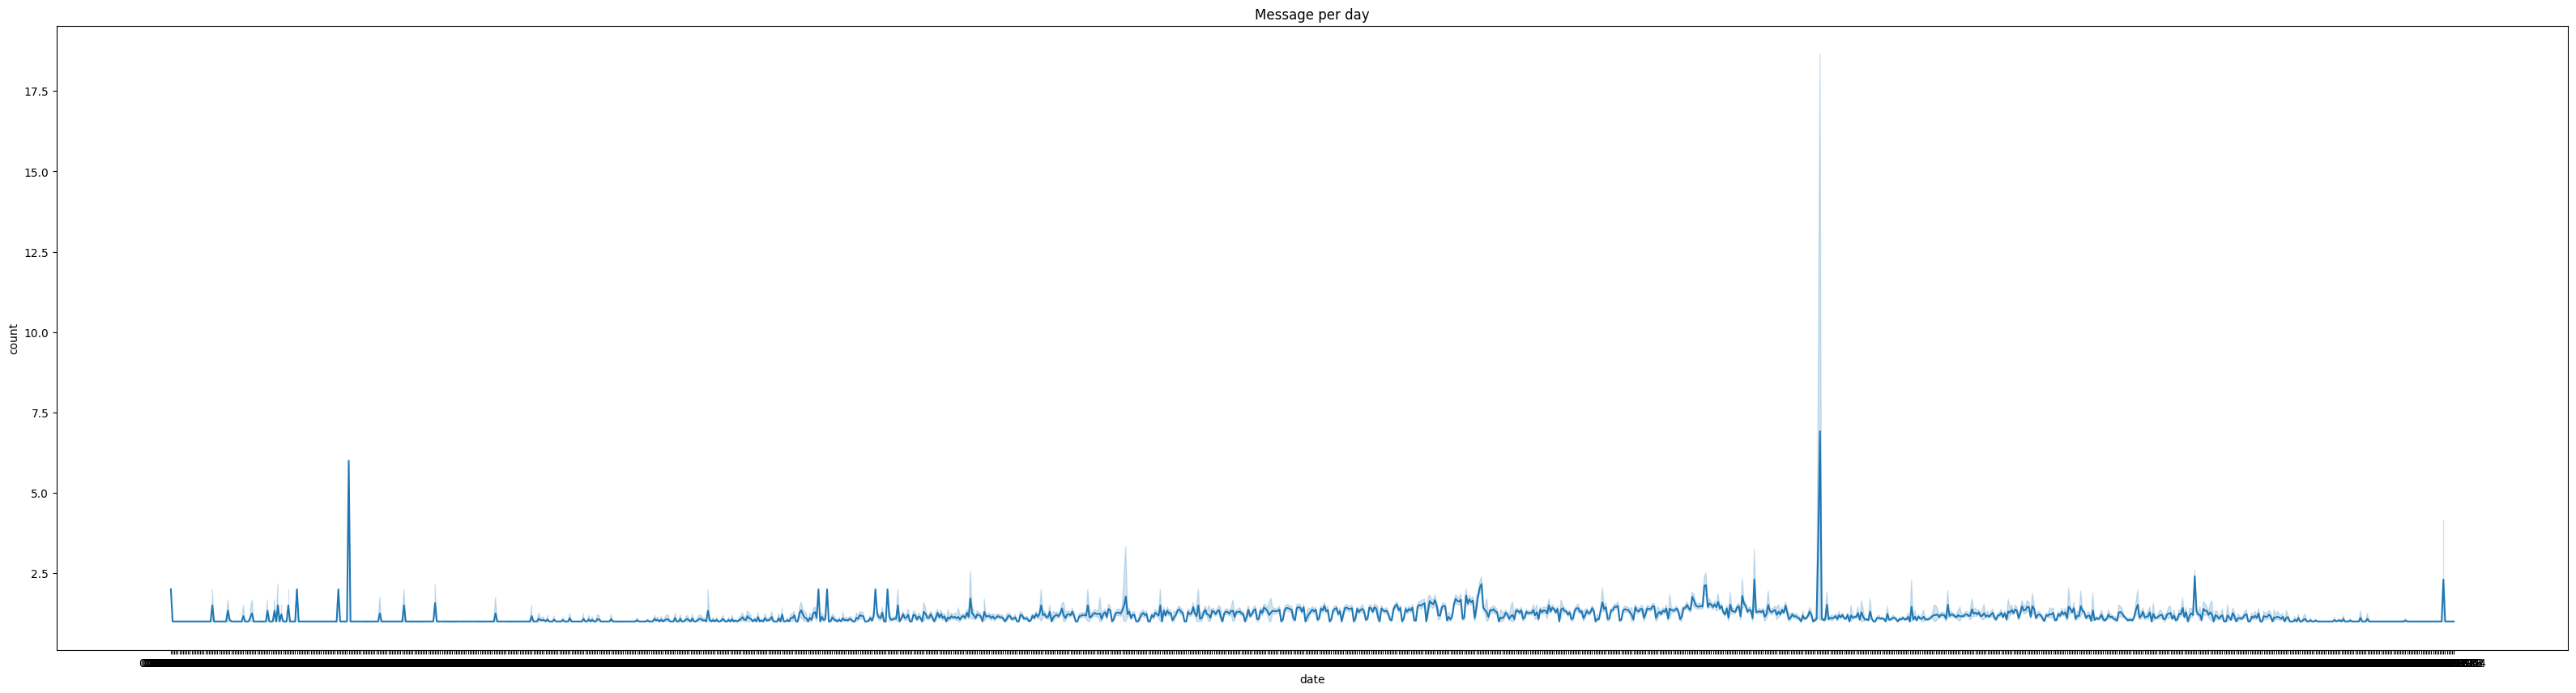

In [112]:
# plotting line graph

graph1 = plt.subplots(figsize=(40,10))
sns.lineplot(x="date", y="count" ,data= messageperday_dataframe)
plt.title('Message per day')
plt.show()

Analysis: From the year 2000 to 2002, the message count per day remained in a similar pattern. 

In [113]:
# count number of email per week using sql query, strftime and COUNT()
SQL = """
SELECT strftime('%Y-%w',Date)
AS Date,
COUNT(*) AS Email FROM message
GROUP BY Date
"""

cur.execute(SQL)

# converting to dataframe
messageperweek_dataframe = pd.read_sql_query(SQL, conn)

# displaying the dataframe
messageperweek_dataframe

,Date,Email
0,0001-3,2
1,0001-1,1
2,0001-2,1
3,0001-3,1
4,0001-1,1
...,...,...
194082,2020-2,1
194083,2043-1,1
194084,2044-6,1
194085,2044-1,1


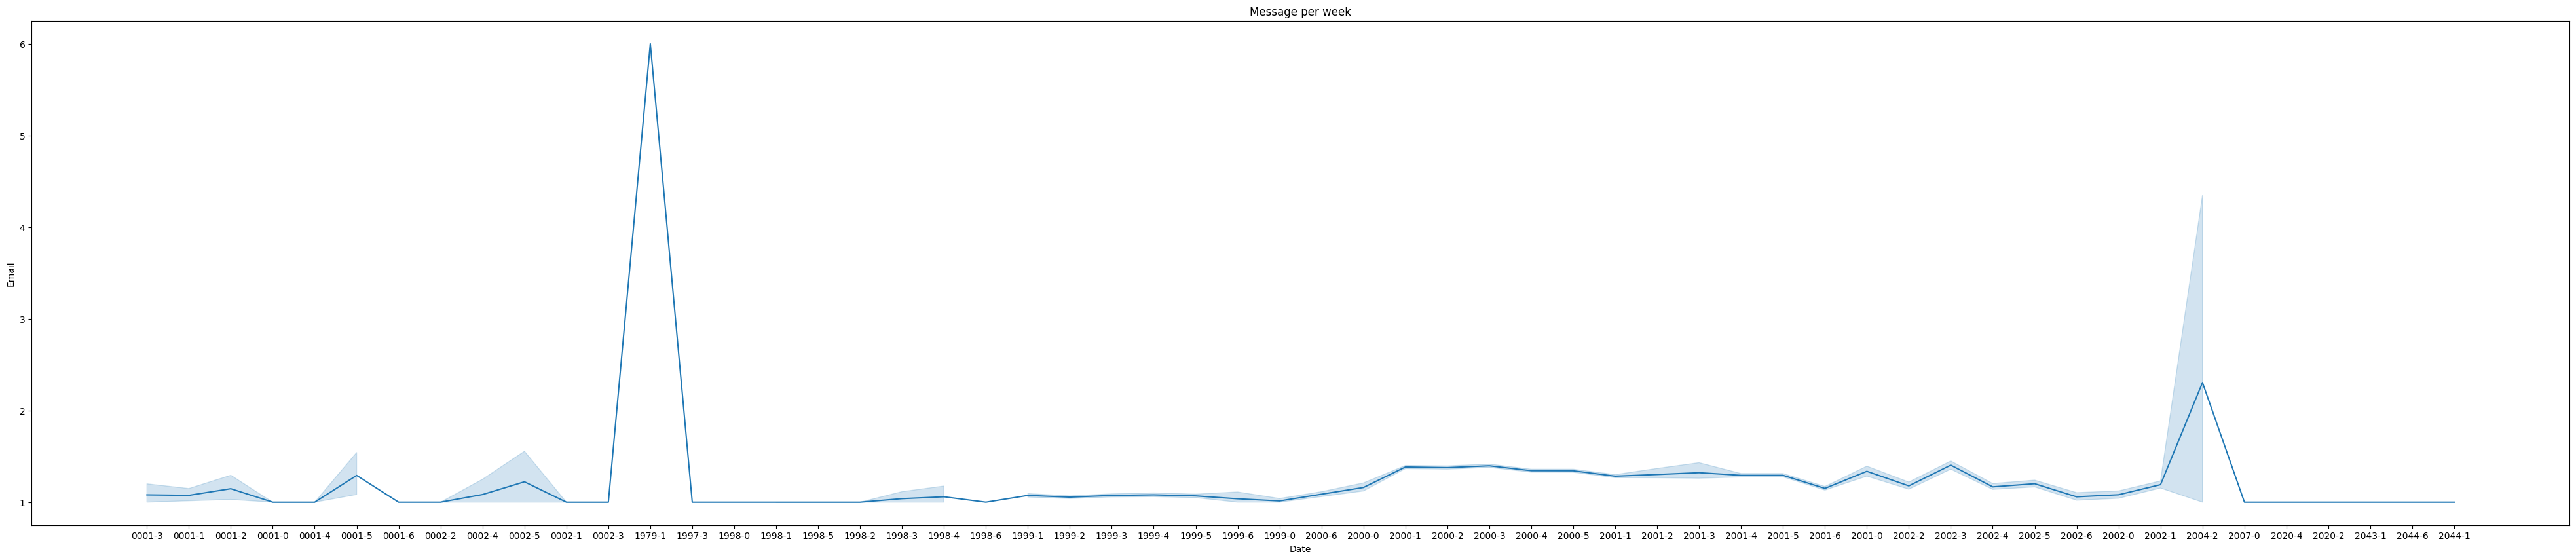

In [114]:
# plotting line graph

graph2 = plt.subplots(figsize=(50,10))
sns.lineplot(x="Date", y="Email" ,data= messageperweek_dataframe)
plt.title('Message per week')
plt.show()

Analysis: As per the line graph above, we can see that in 2002-1, there was a drastic rise in message count until 2007-0. For the rest of the weeks between the years 2000 and 2002, the message count per week remained mostly constant with slightly few highs and ups.

In [115]:
# count number of email per month using sql query, strftime and COUNT()
SQL = """
SELECT strftime('%Y-%m',Date)
AS Date,
COUNT(*) AS Email FROM message
GROUP BY Date
"""

cur.execute(SQL)

# converting to dataframe
messagepermonth_dataframe = pd.read_sql_query(SQL, conn)

# displaying the dataframe
messagepermonth_dataframe

,Date,Email
0,0001-05,2
1,0001-06,1
2,0001-07,1
3,0001-08,1
4,0001-08,1
...,...,...
194082,2020-12,1
194083,2043-12,1
194084,2044-01,1
194085,2044-01,1


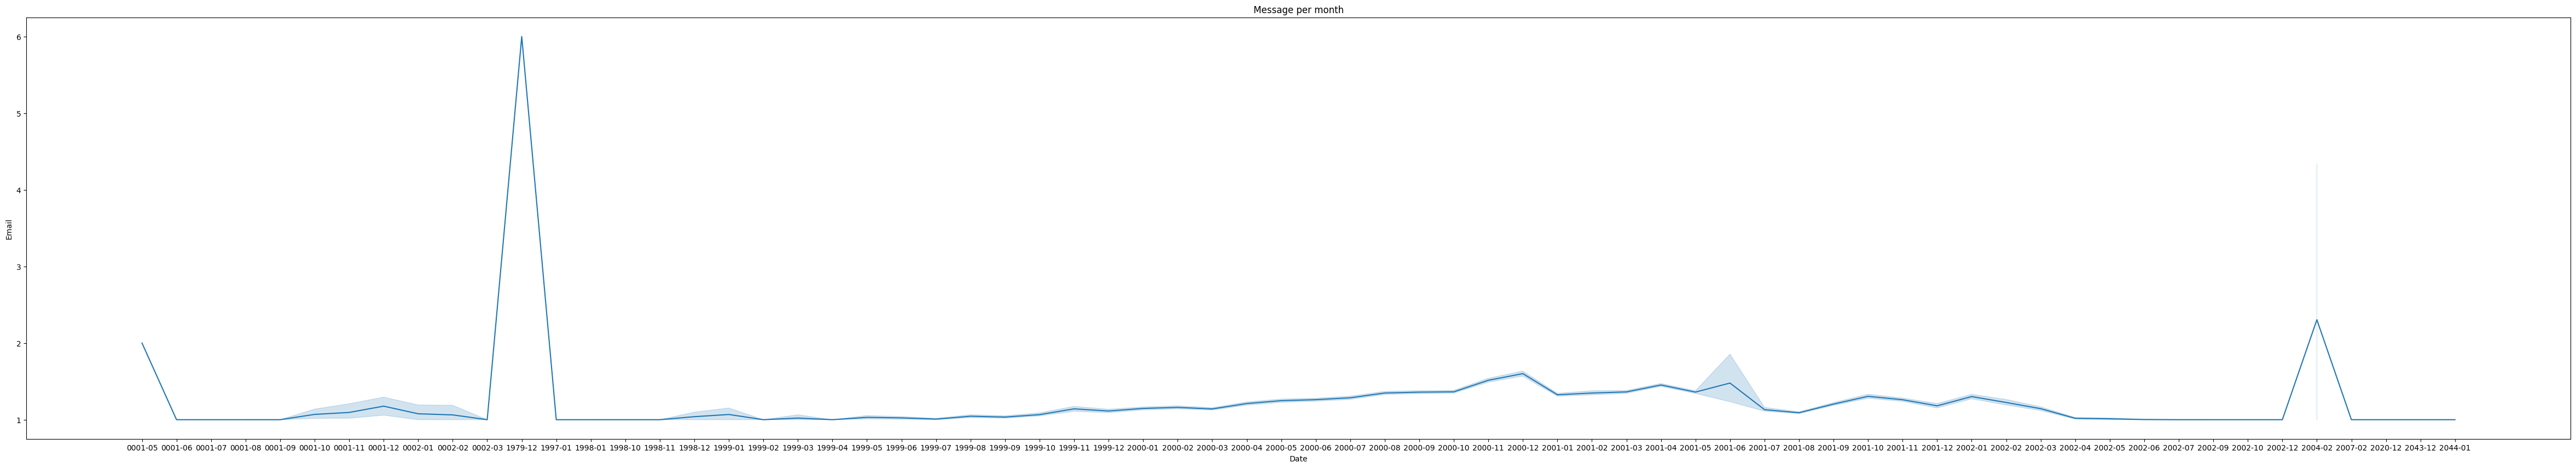

In [116]:
#plotting graph using subplots() and lineplot()

graph3 = plt.subplots(figsize=(60,10))
sns.lineplot(x="Date", y="Email" ,data= messagepermonth_dataframe)
plt.title('Message per month')
plt.show()

Analysis: The line graph above shows the message count per month. We can observe that in 2002, from January to April, the message count kept decreasing and then, as from April to December, the message count remain mostly constant. 

In [117]:
# writing sql query to count top sender using count()

SQL = """
SELECT sender, COUNT(*) AS EmailSenderCount
FROM(
  SELECT sender
  FROM Message m
  )
GROUP BY sender
ORDER BY EmailSenderCount DESC
LIMIT 12
;
"""

# converting to dataframe
sender_dataframe = pd.read_sql_query(SQL,conn)

# displaying the dataframe
sender_dataframe

,sender,EmailSenderCount
0,jeff.dasovich@enron.com,6273
1,j.kaminski@enron.com,5838
2,kay.mann@enron.com,5100
3,sara.shackleton@enron.com,4797
4,tana.jones@enron.com,4437
5,chris.germany@enron.com,3686
6,no.address@enron.com,3511
7,enron.announcements@enron.com,2838
8,matthew.lenhart@enron.com,2784
9,debra.perlingiere@enron.com,2549


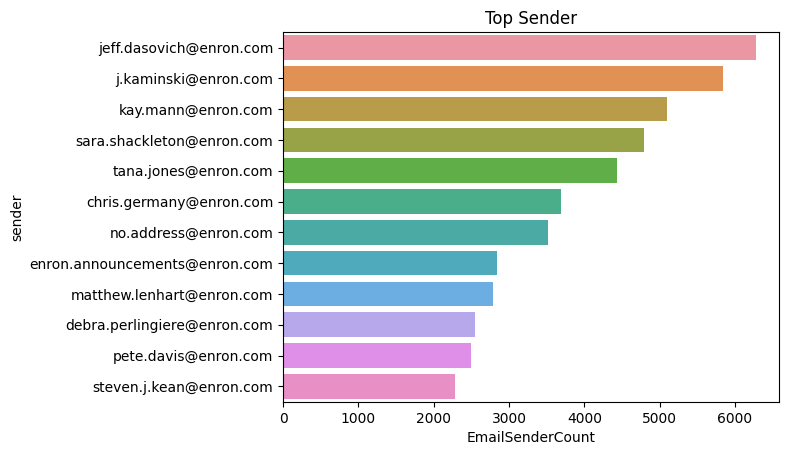

In [118]:
#plot graph using barplot() and show()

data = sender_dataframe
sns.barplot(data=data, y='sender', x='EmailSenderCount')
plt.title('Top Sender')
plt.show()

Analysis: The above bar chart shows the top 12 senders of the Enron Corporation. The most common sender of Enron Corporation is Jeff Dasovich. However, if we go through the email addresses, we can see that the seventh sender has no name and there is a risk that someone may be using this email to try to remain anonymous to commit illegal acts. 

In [119]:
#writing sql query to count top recipient using count()

SQL = """
SELECT rvalue as recipient_email, COUNT(*) AS recipient_email_count FROM Recipientinfo
GROUP BY recipient_email
ORDER BY recipient_email_count DESC
LIMIT 10;
"""
# converting data in dataframe
recipient_dataframe = pd.read_sql(SQL,conn)

# displaying the dataframe
recipient_dataframe

,recipient_email,recipient_email_count
0,no.address@enron.com,19198
1,jeff.dasovich@enron.com,11137
2,richard.shapiro@enron.com,11015
3,steven.j.kean@enron.com,10873
4,james.d.steffes@enron.com,10615
5,tana.jones@enron.com,9781
6,sara.shackleton@enron.com,9633
7,mark.e.taylor@enron.com,9090
8,louise.kitchen@enron.com,7603
9,pete.davis@enron.com,7509


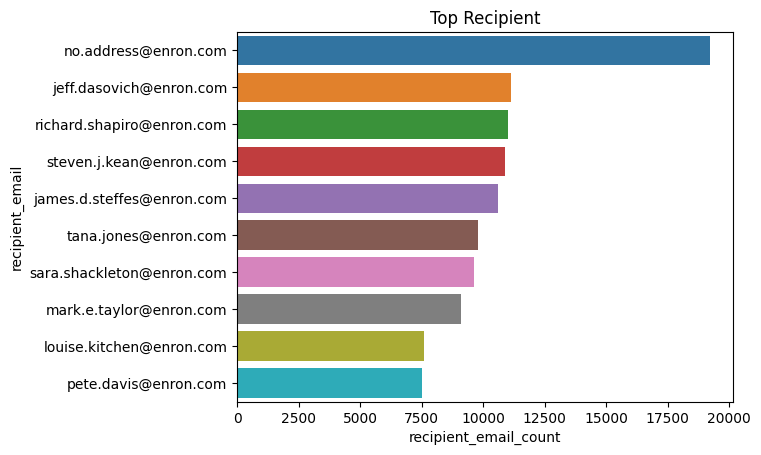

In [120]:
# plotting the graph using barplot() and show()

data = recipient_dataframe
sns.barplot(data=recipient_dataframe, y='recipient_email', x='recipient_email_count')
plt.title('Top Recipient')
plt.show()

Analysis: From the above bar chart, we can see the top 10 recipients of the Enron Corporation. From this visualization, we can notice that the first recipient is drastically higher than the rest of the recipients and the email address does not contain any name unlike the rest of the recipients. This might be an evidence of fraud within the Enron Corporation as it is anonymous. 

In [121]:
# writing sql query to categorize by rtype using count()

SQL = """
SELECT rtype, COUNT (*) AS RecipientType FROM Recipientinfo
GROUP BY rtype
"""
cur.execute(SQL)

# converting data in dataframe
rtype_dataframe = pd.read_sql(SQL,conn)

# displaying the dataframe
rtype_dataframe

,rtype,RecipientType
0,BCC,253713
1,CC,253735
2,TO,1556994


In [122]:
prop_rtype = rtype_dataframe["RecipientType"]/rtype_dataframe["RecipientType"].sum()

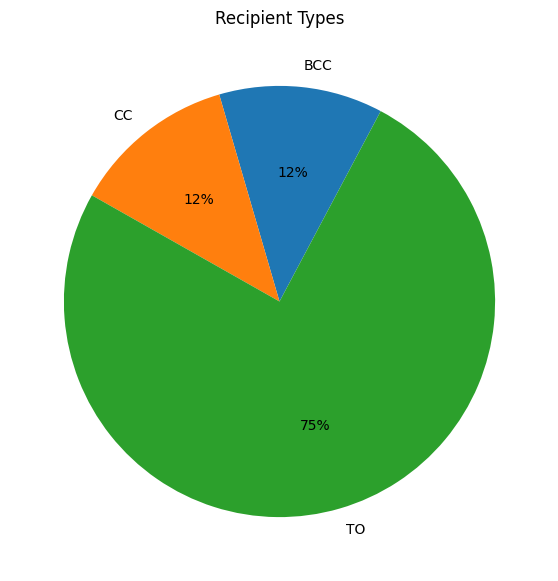

In [123]:
# plotting graph using pie() and show()

pie1 = plt.subplots(figsize=(7,7))
plt.pie(prop_rtype, labels = rtype_dataframe['rtype'], autopct='%.0f%%', startangle=62)
plt.title('Recipient Types')
plt.show()

Analysis: As we can see from the pie chart above, the most common recipient type is ‘to’ as it fills as much as 75% of the pie chart among all the three recipient types. On the other hand, the remaining two recipient types: ‘cc’ and ‘bcc’ are equally used which is 12% each. 

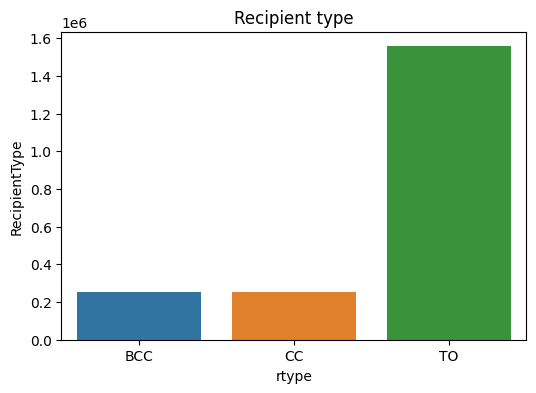

In [124]:
# plotting graph using barplot() and show()

graph3 = plt.subplots(figsize=(6,4))
sns.barplot(x='rtype', y='RecipientType', data=rtype_dataframe)
plt.title('Recipient type')
plt.show()

In [125]:
conn.commit()
conn.close()